In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [23]:
ASD = pd.read_csv('Autism_cleaned_data.csv', index_col=0)

In [24]:
ASD.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes


In [25]:
ASD['Class/ASD Traits '].value_counts()

Yes    728
No     326
Name: Class/ASD Traits , dtype: int64

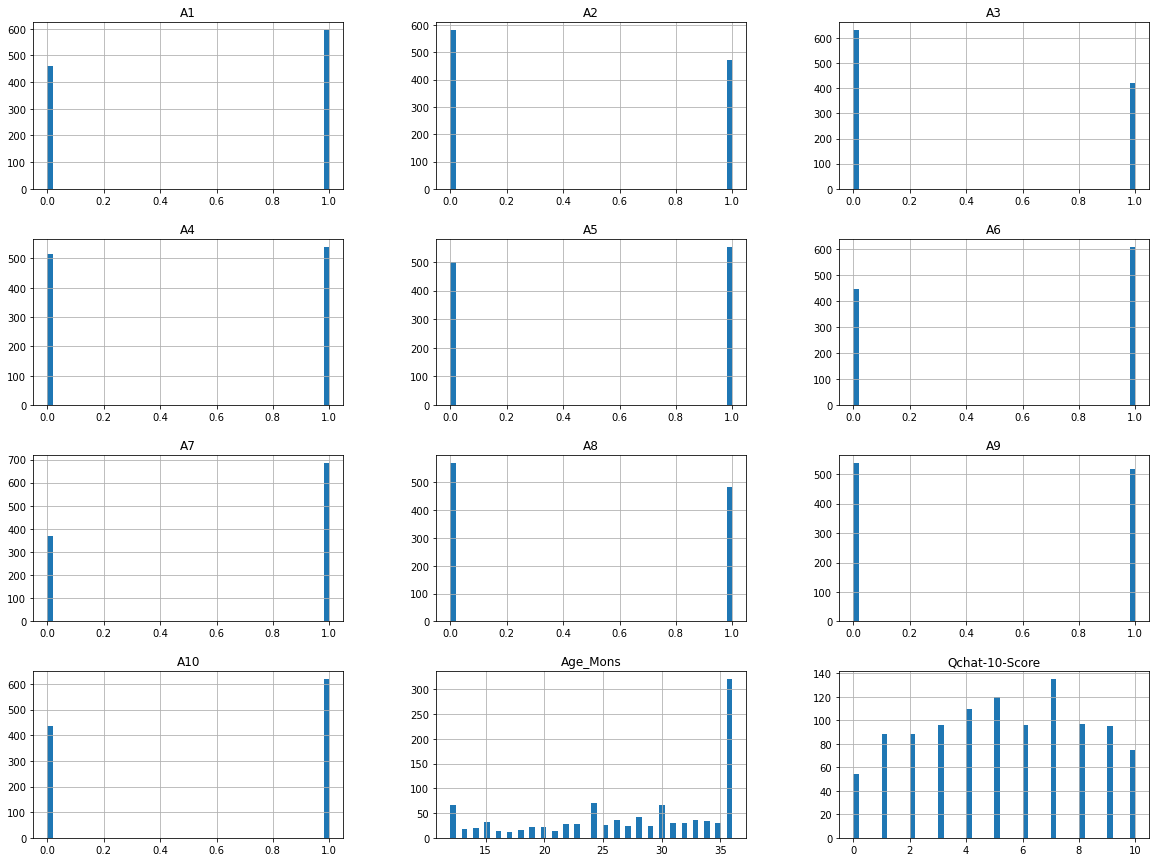

In [53]:
ASD.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

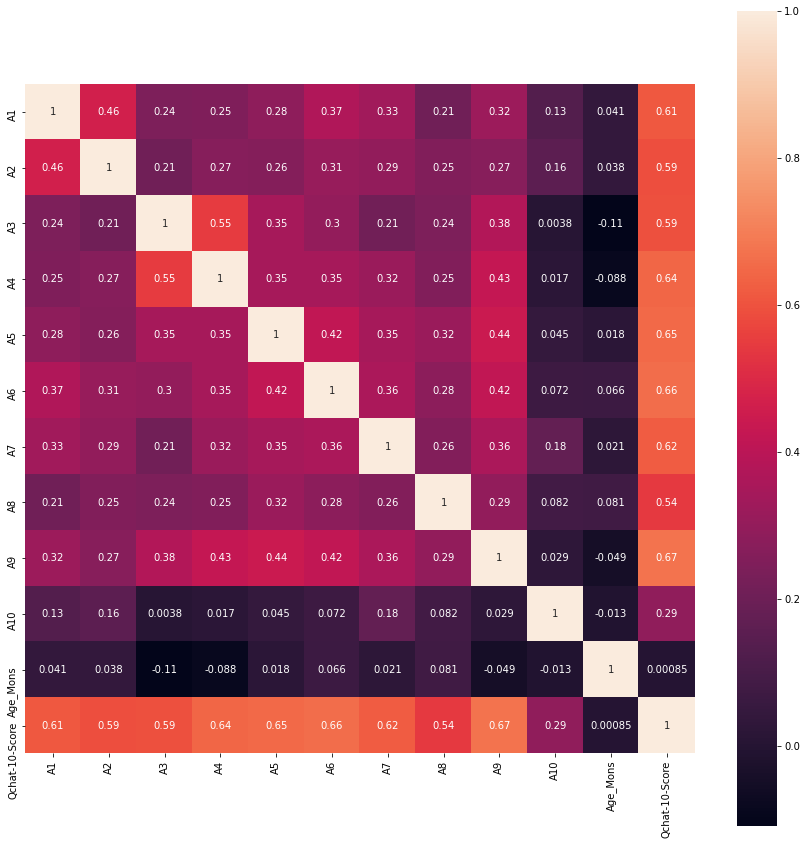

In [26]:
corr = ASD.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

A9 has very strong correlation with Qchat score. A4, A5, A6 are also important.

<AxesSubplot:xlabel='A9', ylabel='count'>

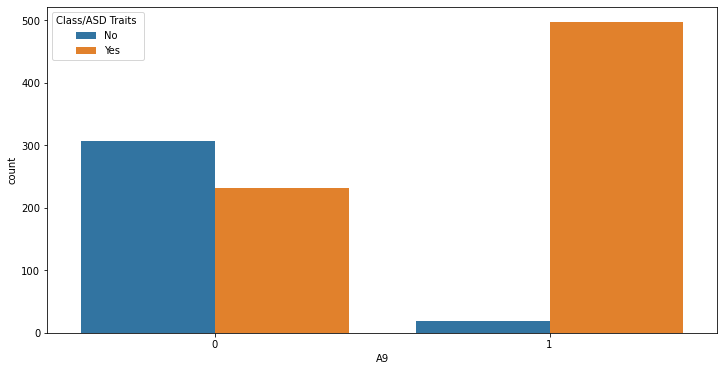

In [43]:
#Effect of A9 question on Class/ASD traits
plt.figure(figsize=(12,6))
sns.countplot(x='A9' , hue='Class/ASD Traits ', data=ASD)

As expected A9 has strong correlation with positive diagnosis

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

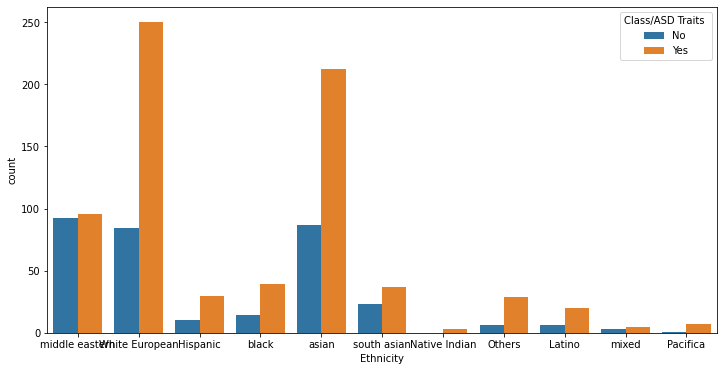

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='Ethnicity', hue='Class/ASD Traits ', data=ASD)

In [48]:
#number of positive cases of Autisim with Regards Ethnicity
yes_autism= ASD[ASD['Class/ASD Traits ']=='Yes']
yes_autism['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Ethnicity'>

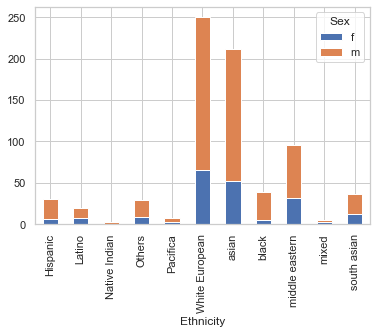

In [63]:
#propotion of male and female positive cases of Autisim with Regards Ethnicity
df_plot = yes_autism.groupby(['Sex', 'Ethnicity']).size().reset_index().pivot(columns='Sex', index='Ethnicity', values=0)
# df_plot
df_plot.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Family_mem_with_ASD', ylabel='count'>

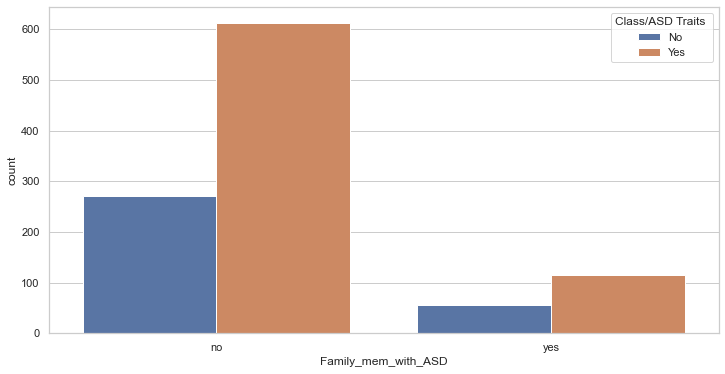

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='Family_mem_with_ASD' , hue='Class/ASD Traits ', data=ASD)

Family history shows small effect in autisim

<AxesSubplot:xlabel='Jaundice', ylabel='count'>

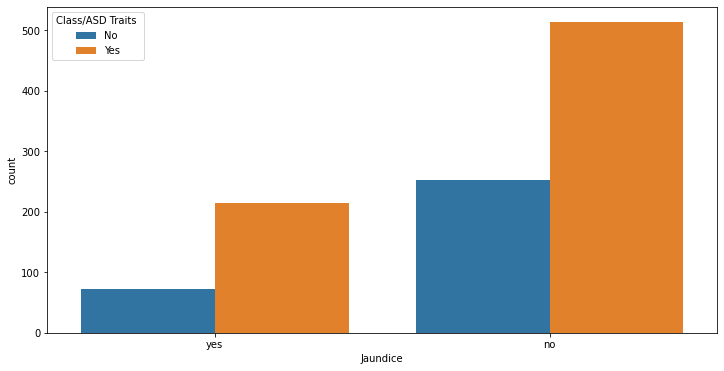

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='Jaundice' , hue='Class/ASD Traits ', data=Autism_data)

In [ ]:
Jaundice is not very important

<AxesSubplot:xlabel='Sex', ylabel='count'>

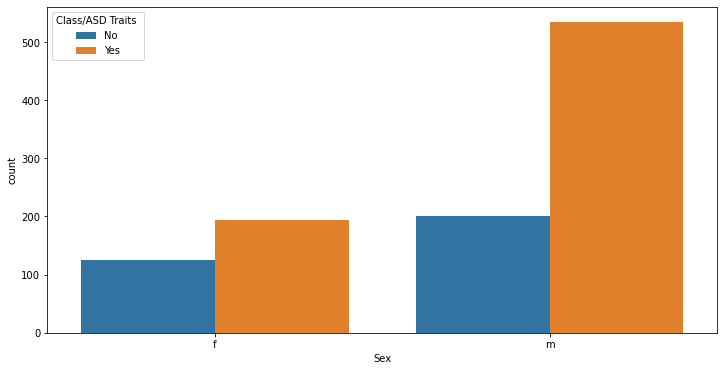

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sex' , hue='Class/ASD Traits ', data=Autism_data)

Males are more positive than females 

<AxesSubplot:xlabel='Age_Mons', ylabel='count'>

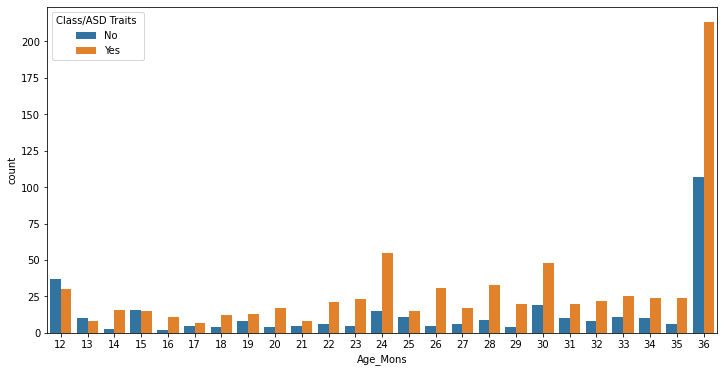

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age_Mons' , hue='Class/ASD Traits ', data=Autism_data)

In [ ]:
In age close to 36 months which is three years shows more positive autism.

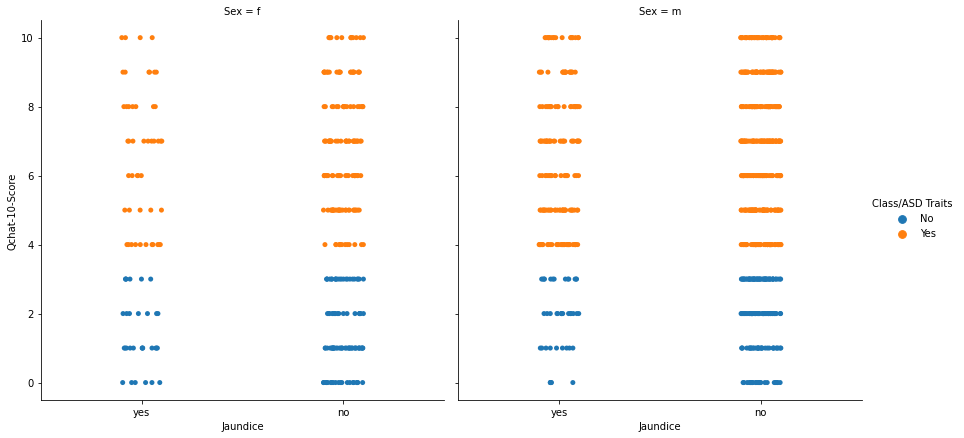

In [20]:
sns.catplot(x="Jaundice", y="Qchat-10-Score", hue="Class/ASD Traits ", col="Sex", data=ASD, height=6 )

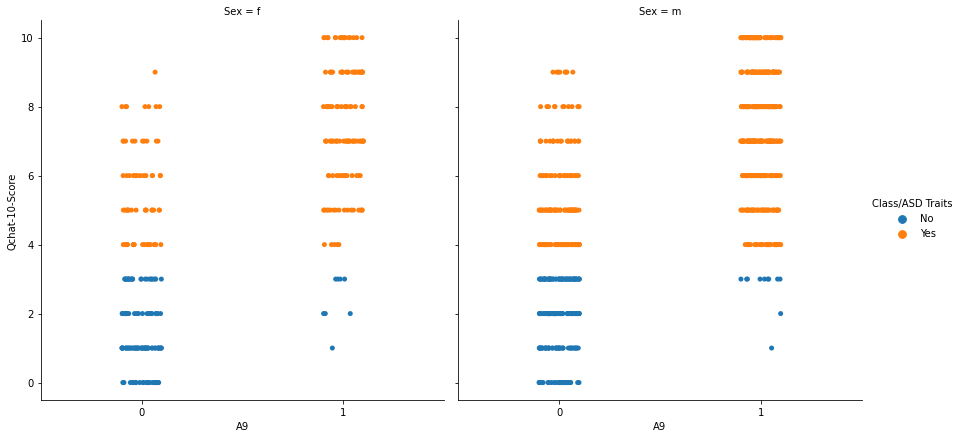

In [21]:
sns.catplot(x="A9", y="Qchat-10-Score", hue="Class/ASD Traits ", col="Sex", data=ASD, height=6 )

<AxesSubplot:xlabel='Sex', ylabel='Qchat-10-Score'>

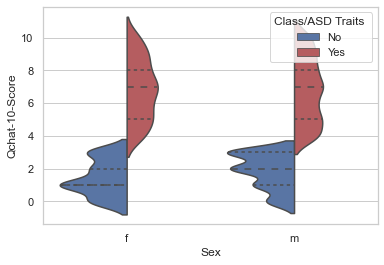

In [58]:
sns.violinplot(x="Sex", y="Qchat-10-Score", hue="Class/ASD Traits ", data=ASD, split=True,
                inner="quart", palette={'Yes': "r", 'No': "b"})